# 贝叶斯推理

从统计数据中对数据进行分析。

## 翻硬币实验

正式定义贝叶斯推理之前，让我们玩一个抛硬币游戏。

想象我们有一袋 100000 个硬币。翻转时，这些硬币会随机落在正面或反面。每枚硬币都有不同的已知概率$p_h$（例如，写在硬币上）落在正面。让我们创造一个虚拟的硬币袋:

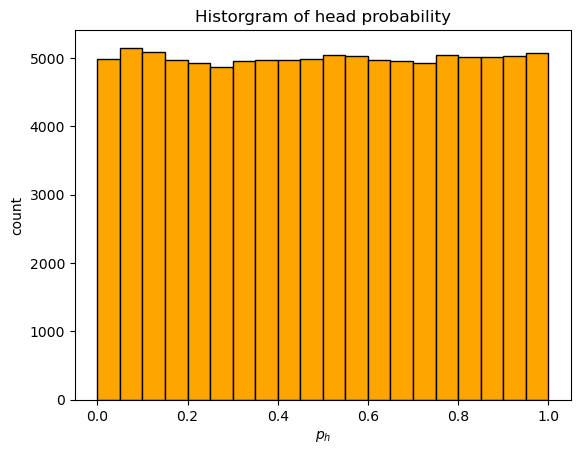

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

N = 100000
coins = np.sort(random.rand(N))

fig, ax = plt.subplots()
ax.hist(coins, bins=20, color="orange", edgecolor="black")
ax.set(title="Historgram of head probability", xlabel="$p_h$", ylabel="count")
plt.show()

## 一个游戏

我们将要玩的游戏如下: 把所有硬币放在桌子上，为更好地可视化，根据概率对它们进行分类; $P_h$小的硬币在桌子的左侧，而$P_h$高的硬币在桌子的右侧。然后，一个朋友选择了一枚硬币。我们的目标是通过多次翻转所有硬币，并询问朋友其手中硬币的结果，来识别其手中硬币及其概率。

**这里的$P_h$表示正面朝上的概率**

我们先定义一个抛硬币的函数

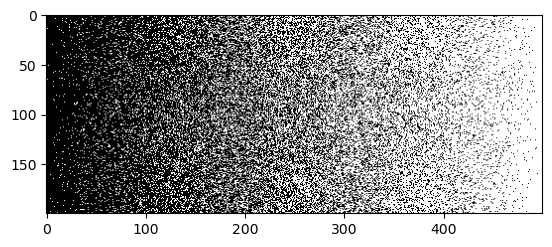

In [2]:
def flip_coin(p):
    return random.choice(["Heads", "Tails"], p=[p, 1-p])

results = np.array([flip_coin(p) for p in coins])

m = np.reshape(results, (-1, 200)) == "Heads"
plt.imshow(m.T, cmap="gray")
plt.show()

可以看到，左边的黑色部分较多，表示硬币大部分是反面；右边白色较多，表示大部分是正面。

**朋友告诉我们，他的硬币是正面**

因此，我们把所有是反面的硬币去除掉，看正面硬币的分布：

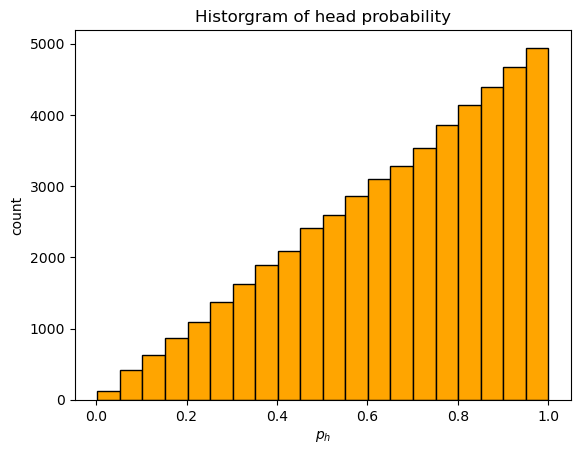

In [3]:
coins1 = coins[results == 'Heads']

fig, ax = plt.subplots()
ax.hist(coins1, bins=20, color="orange", edgecolor="black")
ax.set(title="Historgram of head probability", xlabel="$p_h$", ylabel="count")
plt.show()

这个直方图似乎遵循线性趋势，这是有道理的，因为大约 10% 的 $p_h ≃ 0.1$ 硬币是正面，20% 的 $p_h ≃ 0.2$硬币是正面，依此类推。

在这个阶段，我们还不知道我们的朋友选择了哪枚硬币，但我们更了解它的$p_h$值。事实上，由于秘密硬币是这些剩余的硬币之一，因此认为它更有可能偏向正面而不是反面。我们可以更进一步说，秘密硬币的$p_h$值的概率分布由此直方图给出。当然，秘密硬币有一个固定的$p_h$值，所以这个概率分布是相对于我们的知识而言的。这是一种称为贝叶斯概率或简称为belief的相对概率。

我们对剩下的硬币重新投掷：

In [4]:
results = np.array([flip_coin(p) for p in coins1])

我们的朋友告诉我们，**这次他的硬币是反面**。因此，我们移除所有落在正面的硬币，并可视化剩余硬币的概率直方图：

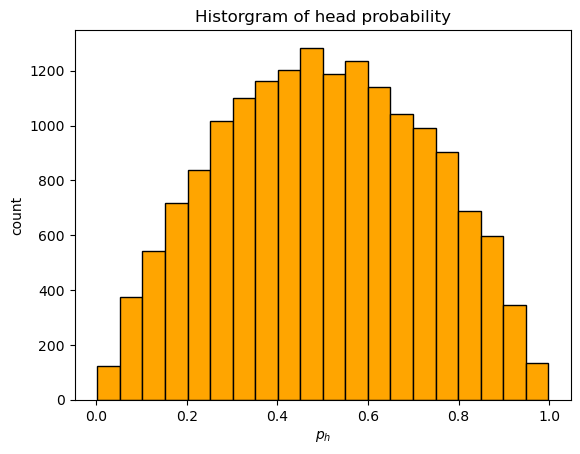

In [5]:
coins2 = coins1[results == 'Tails']

fig, ax = plt.subplots()
ax.hist(coins2, bins=20, color="orange", edgecolor="black")
ax.set(title="Historgram of head probability", xlabel="$p_h$", ylabel="count")
plt.show()

这个直方图，相当于我们对$p_h$的belief，现在是对称的。让我们试着用数学方法确定它的形状。在第一次选择之后，我们确定形状是线性的，因为每个bin只剩下一小部分 $p_h$。在这一步中，我们选择了落在其尾部的硬币，这意味着每个bin只保留一小部分 $1-p_h$ （尾部的概率）。由于初始 bin 计数约为 5000，因此当前 bin 值应约为 $5000p_h（1-p_h ）$：

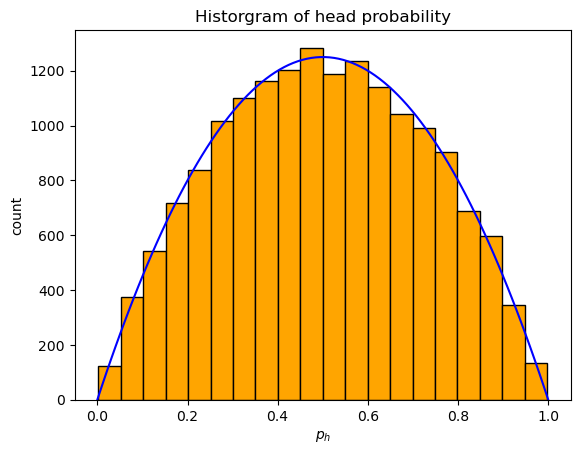

In [6]:
fig, ax = plt.subplots()
ax.hist(coins2, bins=20, color="orange", edgecolor="black")
t = np.linspace(0, 1, 100)
y = 5000*t*(1-t)
ax.plot(t, y, 'b-')
ax.set(title="Historgram of head probability", xlabel="$p_h$", ylabel="count")
plt.show()

让我们最后掷一次硬币，**朋友的硬币结果是正面**，我们期望获得遵循 $5000p_h^2（1-p_h）$的直方图

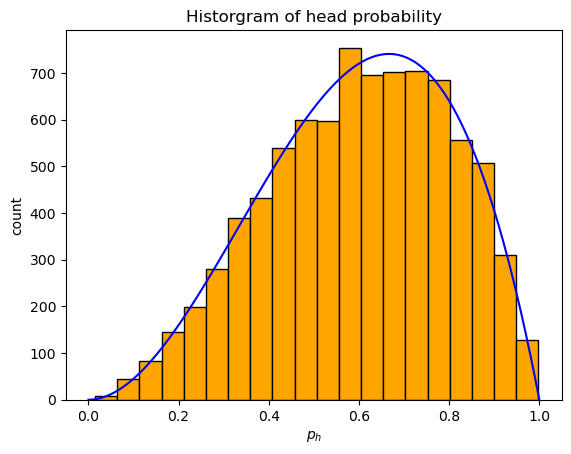

In [7]:
results = np.array([flip_coin(p) for p in coins2])

coins3 = coins2[results == 'Heads']

fig, ax = plt.subplots()
ax.hist(coins3, bins=20, color="orange", edgecolor="black")
t = np.linspace(0, 1, 100)
y = 5000*t*t*(1-t)
ax.plot(t, y, 'b-')

ax.set(title="Historgram of head probability", xlabel="$p_h$", ylabel="count")
plt.show()

我们可以继续这个游戏，直到我们找到秘密硬币。我们玩的游戏实际上相当于一个更有用的游戏：根据硬币的翻转结果历史，确定硬币的价值$p_h$（这里没有袋子）。事实上，想象一下秘密硬币在另一个房间里被翻转。然后，实际上，我们正在使用我们的袋子作为工具，通过实验计算我们对它的$p_h$值的信念。另外，如果袋子是无限的，我们就不再需要它了。我们可以将我们当前的信念乘以$p_h$ 或 $1-p_h$ ，具体取决于要识别的硬币的结果。通过这样做，我们有效地计算了我们对硬币 $p_h$ 值的信念，假设我们对 $p_h$ 的原始信念是 0 和 1 之间的均匀分布。这个过程是贝叶斯推理的一个例子，因为我们从我们先前的信念和数据中推断（即推导）我们对 $p_h$ 的信念。



### 思考题

如果**朋友的硬币前5次的结果是： 正、正、反、反、反**，则其硬币的正面概率$p_h$应该是如何分布的？

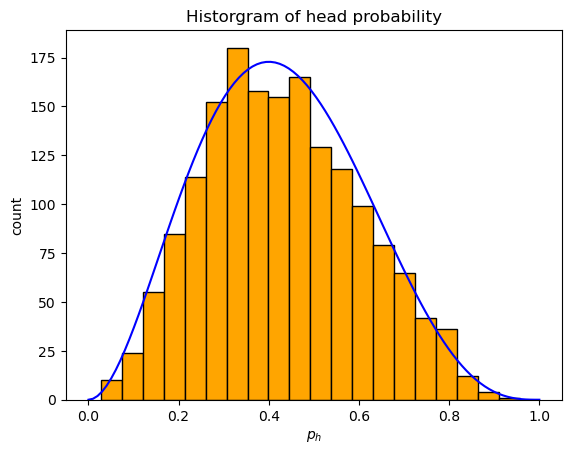

In [8]:
def simulate(tests, n=100000):
    coins = np.sort(random.rand(n))
    for t in tests:
        results = np.array([flip_coin(p) for p in coins])
        coins = coins[results == t]

    return coins

tests = ['Heads', 'Heads', 'Tails', 'Tails', 'Tails']
coins_final = simulate(tests)
fig, ax = plt.subplots()
ax.hist(coins_final, bins=20, color="orange", edgecolor="black")

x = np.linspace(0, 1, 100)
y = 5000

for t in tests:
    if t == 'Heads':
        y = y * x
    elif t == 'Tails':
        y = y * (1 - x)

ax.plot(x, y, 'b-')

ax.set(title="Historgram of head probability", xlabel="$p_h$", ylabel="count")
plt.show()

## 贝叶斯推理

考虑到掷硬币的问题：

- 当没有掷硬币时，$p_h$是$[0-1]$的均匀分布
- 每掷一次硬币，我们就根据观察到的结果更新$p_h$的分布
- 后验概率$P_{post}(model|observed data)$: 是在给定证据之后，假说的概率，是希望求得的信息，也就是在有目前证据时，假说的概率。
- 似然概率$P(observed data|model)$: 指出在给定假设下假说和证据的相容程度。
- 先验概率$P(model)$: 观察到数据（目前证据）之前，假说的概率。

$$
P_{post}(model|observed data) = \frac{P_0(model)P(observed data|model)}{normalization}
$$

通常写作：

$$
P(A|B) = \frac{P(A)P(B|A)}{P(B)}
$$

我们用贝叶斯推理来分析一下掷硬币的问题。当第一次掷硬币得到正面时：

$$
P_{post}(p_h|heads) = \frac{P_0(p_h)P(heads|p_h)}{normalization}
$$

我们的先验在区间 $[0,1]$ 中是均匀的，这意味着所有 $p_h$ 的 $P_0（p_h）= 1$。此外，正面的可能性 $P（heads|p_h ）=p_h$ 。那么，我们的非正则化信念是：

$$
belief = 1*p
$$

正则化之后：

$$
belief = 2 * p
$$

继续推导，如果产生$nheads$次正面，$ntails$次反面，则：

$$
belief = p^{nheads}*(1-p)^{ntails} / Beta(nheads+1, ntails+1)
$$


### 练习题

随机产生N次掷硬币的结果，计算并画出硬币正面的概率分布图（不用正则化）
